对于经营者来说，最需要了解的就是以下几点：
1.哪家店销售情况最好。
2.哪些商品畅销。
3.购物者的选择偏好，即购买某一商品的顾客大部分会同时购买什么商品，形成推荐。
4.怎么推荐一些折扣商品吸引更多顾客办理会员。

In [1]:
import pandas as pd
data1 = pd.read_csv(r'Basket-2018-06-01-2018-07-05.csv')
data1.head()

,SHOP_DATETIME,STORE_CODE,POS_NO,BASK_CODE,BASK_SPEND
0,2018-06-01,D007,3,250458,8.0
1,2018-06-01,D007,3,250200,32.7
2,2018-06-01,D007,1,161068,16.8
3,2018-06-01,D007,8,5325,30.4
4,2018-06-01,D007,8,5361,191.3


In [5]:
data1.shape

(571552, 5)

可以看出这个数据集有近60万条数据

In [8]:
data1["SHOP_DATETIME"] = pd.to_datetime(data1["SHOP_DATETIME"])

我们首先了解一下这一个月内哪家店总销量最高。

In [11]:
df1=data1.groupby('STORE_CODE').sum()
df1

,POS_NO,BASK_CODE,BASK_SPEND
STORE_CODE,,,
A001,363398,11605971867,3.435303e+06
A004,27718,1529688783,5.123467e+05
A006,65757,8062830890,9.383050e+05
A007,36708,2053120185,6.866382e+05
A008,94583,7763818159,1.311171e+06
A009,34405,4647022389,7.977389e+05
A010,49184,4793496547,6.448924e+05
A012,64419,5934484788,8.469747e+05
A013,110323,5146283161,1.117126e+06


In [33]:
df1.sort_values(by=['BASK_SPEND'])

,POS_NO,BASK_CODE,BASK_SPEND
STORE_CODE,,,
D003,15520,453135195,2.435843e+05
D010,33093,2081073158,3.636179e+05
A017,13619,2290840508,3.945074e+05
D009,46197,2246457749,4.704280e+05
A022,28610,892308073,4.874459e+05
A004,27718,1529688783,5.123467e+05
D005,32252,3053635207,5.541030e+05
A018,19002,2878969449,5.584417e+05
A010,49184,4793496547,6.448924e+05


用图形进行更为直观的表示

In [28]:
import matplotlib.pyplot as plt

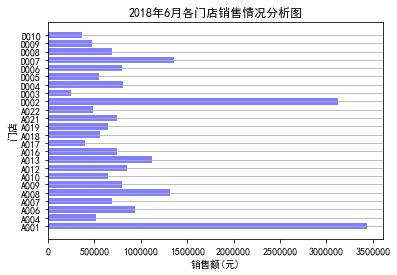

In [32]:
plt.rcParams['font.sans-serif']=['SimHei']
y=['A001','A004','A006','A007','A008','A009','A010','A012','A013','A016','A017','A018','A019','A021','A022','D002','D003','D004','D005','D006','D007','D008','D009','D010']
height=df1['BASK_SPEND']
plt.grid(axis="y",which="major")
plt.xlabel('销售额(元)')
plt.ylabel('门店')
plt.title('2018年6月各门店销售情况分析图')
plt.barh(y,height,align='center',color='b',alpha=0.5)
plt.show()

可以看到，销售量最高的是A001,销量最低的是D003。对门店进行分析之后，我们对商品进行具体分析。

In [62]:
data2 = pd.read_csv(r'item-2018-06-01-2018-07-05.csv')
data2.head()

,SDATE,STORE_CODE,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_TYPE,DISCOUNT_AMOUNT
0,2018-06-01,D007,3,250451,29405,1.000,1.70,2.0,m,-0.3
1,2018-06-01,D007,3,250451,13187,1.000,1.00,1.0,n,0.0
2,2018-06-01,D007,3,250243,196249,1.000,99.00,99.0,m,0.0
3,2018-06-01,D007,3,250243,199637,1.000,9.90,16.8,p,-6.9
4,2018-06-01,D007,1,160905,195012,3.222,18.69,5.8,n,0.0


In [42]:
df2=data2.groupby('PROD_CODE')
df2

In [46]:
df3=df2['PROD_CODE'].count()
df3

PROD_CODE
19         13
31        141
33         15
36         52
39         83
43         10
49         81
55        236
56         83
57         10
59         99
61        169
62        162
63        191
64        296
65        472
66        961
67        130
68        266
70        886
72        190
73         67
74        339
75         80
76        237
77        155
78        103
79        152
80        207
83        150
         ... 
224852      2
224853      1
224854      1
224855      1
224856      3
224857      3
224858      3
224860      2
224866     17
224868      2
224873      1
224913      2
224920      4
224921      8
224922      7
224923      9
224937      1
224938      4
224939      1
224941     20
224942     11
224943      3
224944     37
224945     23
224946     21
224973      1
224993      1
225009      1
225046      6
225047      1
Name: PROD_CODE, Length: 19271, dtype: int64

In [57]:
df3.describe()

count    19271.000000
mean        89.915469
std        330.730932
min          1.000000
25%          3.000000
50%         12.000000
75%         56.000000
max      12622.000000
Name: PROD_CODE, dtype: float64

可以看出商品一共有近2W种

In [55]:
df3.sort_values(ascending=False)

PROD_CODE
205540    12622
21835     10459
194690     9548
72811      7747
178462     7373
197532     7289
205437     6725
1557       6041
109584     5932
216571     5675
198366     5481
75283      5380
3096       5304
124556     5282
3046       5241
219118     4800
191955     4738
124554     4727
7133       4674
196250     4594
125140     4495
157970     4492
107293     4470
217998     4316
207085     4177
4190       4149
21689      4029
174621     4025
190286     3984
23460      3901
          ...  
192688        1
192780        1
21814         1
191962        1
21824         1
21825         1
190726        1
190907        1
191110        1
191112        1
191165        1
191204        1
191243        1
191280        1
191331        1
191382        1
191406        1
191421        1
191469        1
191488        1
191502        1
191566        1
191680        1
191751        1
191776        1
21920         1
191777        1
21857         1
191882        1
225047        1
Name: PROD_COD

可以看出在这近2w种商品中，205540和21835这两种是销量排前两名的，且销售数量都过万了。我们具体看一下他们的信息。可以看到销售数目最多的是205540这种商品，该商品售价为1.5元，属于价格较低的商品，所以虽然销售数量高，但总销量不高。我们应该考虑售价和数量都较高的商品。